# Install all necessary libraries

In [1]:
#! pip install pandas scikit-learn lazypredict

# Import all necessary libraries

In [2]:
import time
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import lazypredict
from lazypredict.Supervised import LazyRegressor

# Read in Bioactivity Data

## What is pIC50?

In [3]:
df = pd.read_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')
df

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.33,2.80,0.00,6.00,6.12
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.91,4.55,0.00,5.00,7.00
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.85,5.36,0.00,5.00,4.30
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.85,4.71,0.00,5.00,6.52
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.33,3.10,0.00,6.00,6.10
...,...,...,...,...,...,...,...,...,...
4690,4690,CHEMBL4293155,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3Cl)CC...,intermediate,511.15,7.07,2.00,3.00,5.61
4691,4691,CHEMBL4282558,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc(Cl)c3)...,intermediate,511.15,7.07,2.00,3.00,5.60
4692,4692,CHEMBL4281727,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccc(Br)cc3)...,intermediate,555.60,7.18,2.00,3.00,5.42
4693,4693,CHEMBL4292349,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc([N+](=...,intermediate,521.70,6.33,2.00,5.00,5.46


In [4]:
df.dtypes

Unnamed: 0              int64
molecule_chembl_id     object
canonical_smiles       object
class                  object
MW                    float64
LogP                  float64
NumHDonors            float64
NumHAcceptors         float64
pIC50                 float64
dtype: object

# Data Visualization

In [5]:
active_df = df[df['class']=='active']['pIC50'].values
intermediate_df = df[df['class']=='intermediate']['pIC50'].values
inactive_df = df[df['class']=='inactive']['pIC50'].values

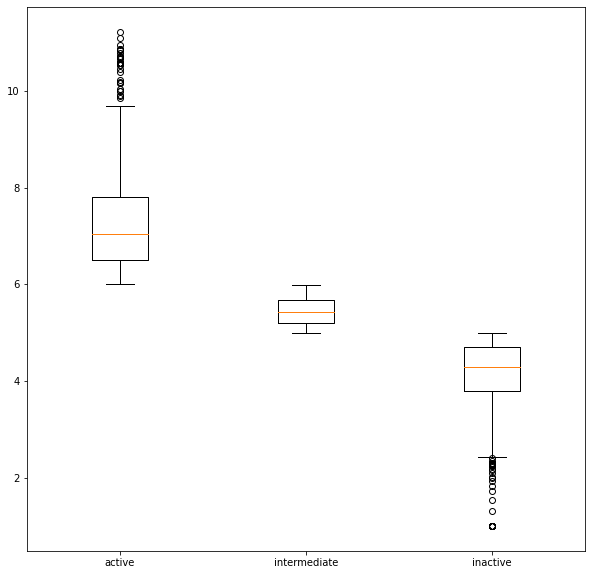

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
labels = ['active', 'intermediate', 'inactive']
plt.boxplot([active_df, intermediate_df, inactive_df], labels=labels)
plt.show()

# Read in PaDEL Descriptors

## What are PaDEL descriptors?

In [7]:
padel_descriptors = pd.read_csv('descriptors_output.csv')
padel_descriptors

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL130098,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL336538,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL341437,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,CHEMBL4293155,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4691,CHEMBL4282558,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4692,CHEMBL4281727,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4693,CHEMBL4292349,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
padel_descriptors.dtypes

Name            object
PubchemFP0       int64
PubchemFP1       int64
PubchemFP2       int64
PubchemFP3       int64
                 ...  
PubchemFP876     int64
PubchemFP877     int64
PubchemFP878     int64
PubchemFP879     int64
PubchemFP880     int64
Length: 882, dtype: object

# Preparing the X and Y Data Matrices

In [9]:
X = padel_descriptors.drop(columns=['Name'])
y = df['pIC50']

# Preprocess Data

In [10]:
# Remove low variance features / columns
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(4695, 137)

# Model Training (Random Forests)

In [11]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10)

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3990, 137), (3990,), (705, 137), (705,))

In [13]:
model = RandomForestRegressor(n_estimators=100) # number of trees in the forest
model.fit(X_train, y_train)

RandomForestRegressor()

## Calculate R-Squared

In [14]:
r_squared = model.score(X_test, y_test)
r_squared

0.3178079057381862

In [15]:
y_pred = model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

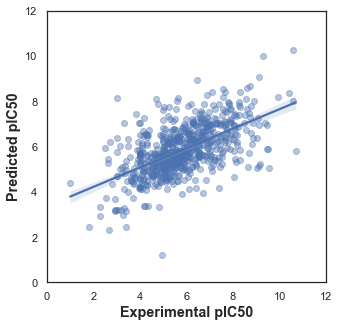

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# Build and Compare ML Algorithms

In [17]:
# Initialize lazyregressor
reg = LazyRegressor(predictions=True) # this one works better
#reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

In [18]:
# This takes a while to create all those base models...
start = time.time()
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
end = time.time()

100%|█████████████████████████████████████████████████████████████████████| 42/42 [22:40<00:00, 32.38s/it]


In [19]:
end - start # processing time in seconds

1360.1851871013641

In [20]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.17,0.33,1.23,0.18
HistGradientBoostingRegressor,0.17,0.33,1.23,1.11
RandomForestRegressor,0.15,0.32,1.24,2.77
BaggingRegressor,0.12,0.29,1.26,0.31
NuSVR,0.12,0.29,1.26,1.08
SVR,0.10,0.28,1.27,1.46
GradientBoostingRegressor,0.06,0.24,1.30,1.10
KNeighborsRegressor,0.06,0.24,1.30,0.09
XGBRegressor,0.05,0.23,1.31,0.55


In [21]:
predictions

,AdaBoostRegressor,BaggingRegressor,BayesianRidge,DecisionTreeRegressor,DummyRegressor,ElasticNet,ElasticNetCV,ExtraTreeRegressor,ExtraTreesRegressor,GammaRegressor,...,RANSACRegressor,RandomForestRegressor,Ridge,RidgeCV,SGDRegressor,SVR,TransformedTargetRegressor,TweedieRegressor,XGBRegressor,LGBMRegressor
0,5.82,5.53,5.81,5.50,5.83,5.83,5.75,5.50,5.50,5.88,...,4.22,5.49,5.82,5.80,5.66,5.63,5.83,5.90,5.19,5.47
1,5.65,4.62,5.61,4.80,5.83,5.83,5.51,4.80,4.80,5.74,...,3.83,4.86,5.42,5.44,5.71,5.12,5.43,5.76,5.01,5.25
2,6.93,7.70,7.09,8.54,5.83,5.83,7.14,8.54,8.54,6.77,...,5.13,7.73,7.19,7.17,7.04,7.08,7.19,6.75,7.86,7.25
3,5.67,5.69,5.57,5.67,5.83,5.83,5.50,5.67,5.67,5.71,...,2.59,5.73,5.43,5.47,5.44,4.99,5.42,5.71,5.37,5.19
4,5.30,6.67,5.74,6.25,5.83,5.83,5.78,6.25,6.25,5.53,...,6.77,6.10,5.77,5.77,5.84,5.53,5.76,5.56,6.03,5.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,5.77,5.34,5.90,4.70,5.83,5.83,5.89,4.70,4.70,5.73,...,4.07,4.96,5.88,5.87,5.81,4.60,5.88,5.75,4.80,5.06
701,5.82,4.56,5.54,4.46,5.83,5.83,5.45,4.46,4.45,5.76,...,2.76,4.59,5.35,5.37,5.32,5.18,5.34,5.77,4.19,4.88
702,5.72,4.96,5.47,5.09,5.83,5.83,5.35,5.09,5.09,5.61,...,4.42,5.09,5.22,5.29,5.33,5.12,5.21,5.65,5.62,5.18
703,5.65,4.71,5.25,4.81,5.83,5.83,5.23,4.81,4.81,5.35,...,3.66,4.82,5.33,5.31,5.39,5.12,5.33,5.36,4.83,4.90


# Actuals vs. Predicted

In [22]:
print(f'Min: {min(active_df)}, Max: {max(active_df)}')
print(f'Min: {min(intermediate_df)}, Max: {max(intermediate_df)}')
print(f'Min: {min(inactive_df)}, Max: {max(inactive_df)}')

Min: 6.0, Max: 11.221848749616356
Min: 5.000869458712629, Max: 5.995678626217358
Min: 1.0, Max: 5.0


In [23]:
def calculate_bioactivity(x):
    """Calculate bioactivity given pIC50 value"""
    if x >= 1 and x < 5: return 'inactive'
    elif x >= 5 and x < 6: return 'intermediate'
    else: return 'active'

In [24]:
# Get best performing model and start with fine-tuning this one to improve
best = models.index[0]
best

'LGBMRegressor'

In [25]:
# Pick the top performing model to test out
actuals = df.iloc[y_test.index]['class']
correct = 0
for actual, prediction in zip(actuals, predictions[best]):
    pred = calculate_bioactivity(prediction)
    if actual == pred: correct += 1

In [26]:
round(correct / len(y_test), 2) # confirm accuracy with model's R-Squared

0.56